In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('/content/Heart Failure.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [ ]:
print("Sex:",df['Sex'].unique())
print("Chest Pain Types:",df['ChestPainType'].unique())
print("Resting ECG:",df['RestingECG'].unique())
print("Exercise Angina:",df['ExerciseAngina'].unique())
print("ST Slope:",df['ST_Slope'].unique())

Sex: ['M' 'F']
Chest Pain Types: ['ATA' 'NAP' 'ASY' 'TA']
Resting ECG: ['Normal' 'ST' 'LVH']
Exercise Angina: ['N' 'Y']
ST Slope: ['Up' 'Flat' 'Down']


##Understanding the data

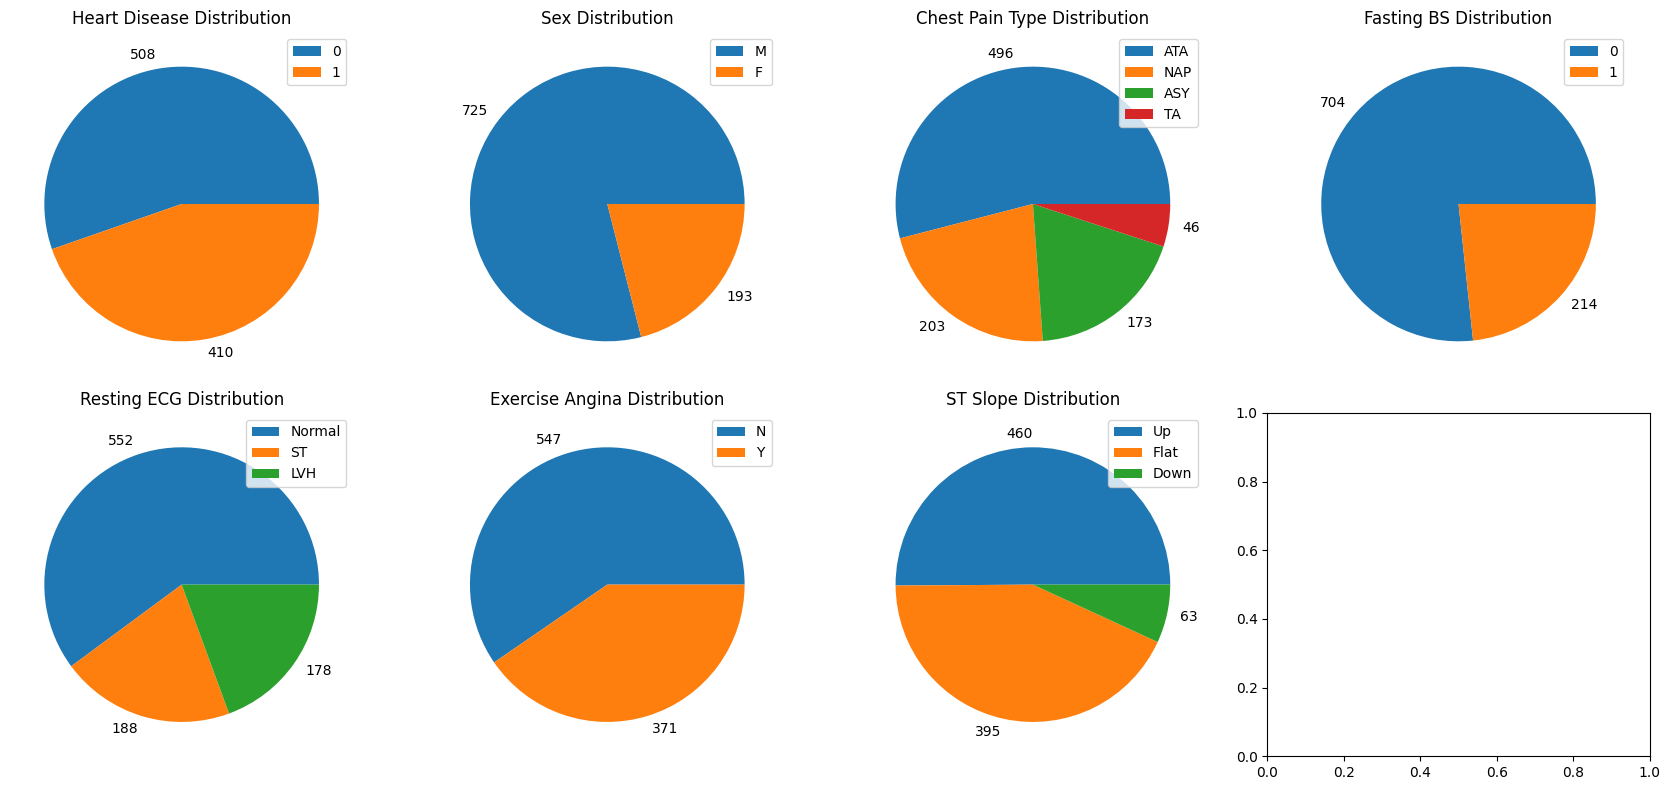

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (17,8))

axes[0,0].pie(df['HeartDisease'].value_counts(), labels=df['HeartDisease'].value_counts())
axes[0,0].set_title('Heart Disease Distribution')
axes[0,0].legend(df['HeartDisease'].unique(), loc='upper right')

axes[0,1].pie(df['Sex'].value_counts(), labels=df['Sex'].value_counts())
axes[0,1].set_title('Sex Distribution')
axes[0,1].legend(df['Sex'].unique(), loc='upper right')

axes[0,2].pie(df['ChestPainType'].value_counts(), labels=df['ChestPainType'].value_counts())
axes[0,2].set_title('Chest Pain Type Distribution')
axes[0,2].legend(df['ChestPainType'].unique(), loc='upper right')

axes[0,3].pie(df['FastingBS'].value_counts(), labels=df['FastingBS'].value_counts())
axes[0,3].set_title('Fasting BS Distribution')
axes[0,3].legend(df['FastingBS'].unique(), loc='upper right')

axes[1,0].pie(df['RestingECG'].value_counts(), labels=df['RestingECG'].value_counts())
axes[1,0].set_title('Resting ECG Distribution')
axes[1,0].legend(df['RestingECG'].unique(), loc='upper right')

axes[1,1].pie(df['ExerciseAngina'].value_counts(), labels=df['ExerciseAngina'].value_counts())
axes[1,1].set_title('Exercise Angina Distribution')
axes[1,1].legend(df['ExerciseAngina'].unique(), loc='upper right')

axes[1,2].pie(df['ST_Slope'].value_counts(), labels=df['ST_Slope'].value_counts())
axes[1,2].set_title('ST Slope Distribution')
axes[1,2].legend(df['ST_Slope'].unique(), loc='upper right')

plt.tight_layout()

plt.show()

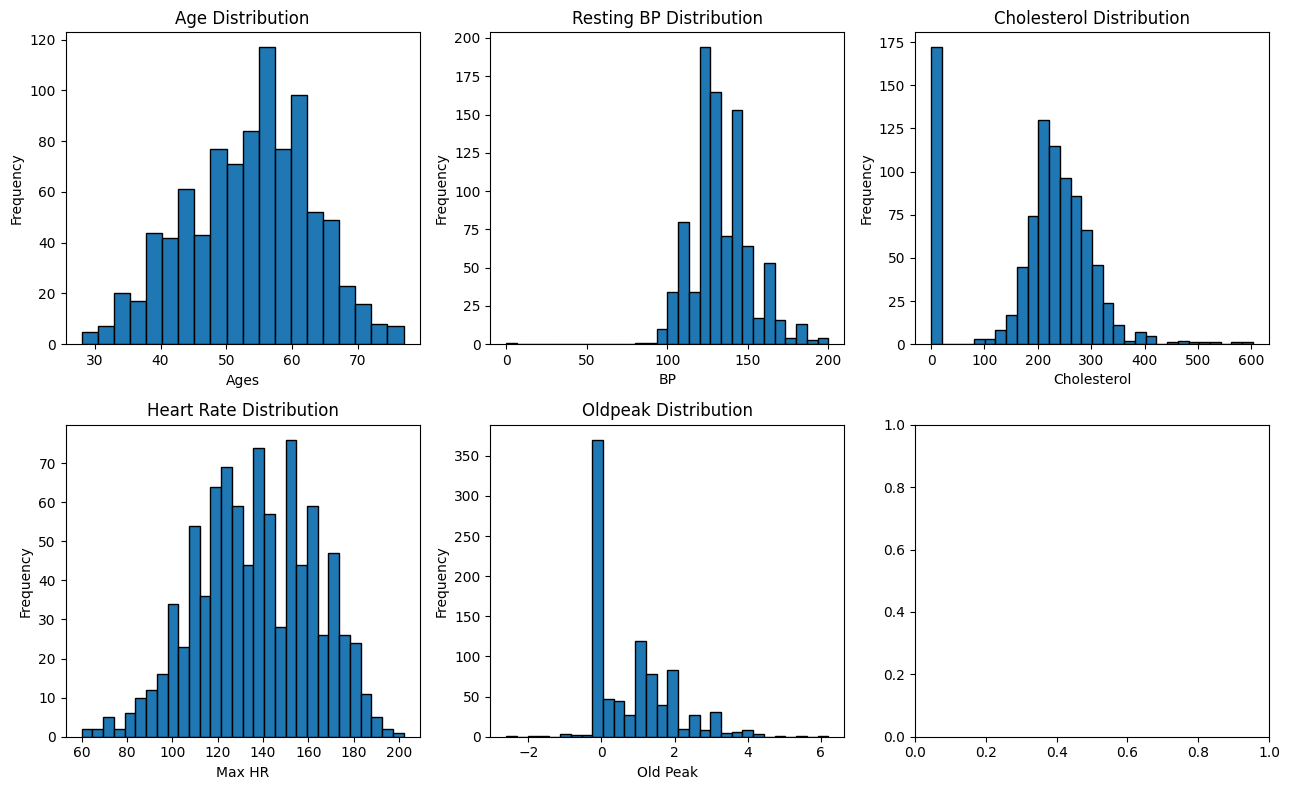

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (13,8))


axes[0,0].hist(df['Age'], edgecolor='black', bins=20)
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Ages')
axes[0,0].set_ylabel('Frequency')

axes[0,1].hist(df['RestingBP'], edgecolor='black', bins=30)
axes[0,1].set_title('Resting BP Distribution')
axes[0,1].set_xlabel('BP')
axes[0,1].set_ylabel('Frequency')

axes[0,2].hist(df['Cholesterol'], edgecolor='black', bins=30)
axes[0,2].set_title('Cholesterol Distribution')
axes[0,2].set_xlabel('Cholesterol')
axes[0,2].set_ylabel('Frequency')

axes[1,0].hist(df['MaxHR'], edgecolor='black', bins=30)
axes[1,0].set_title('Heart Rate Distribution')
axes[1,0].set_xlabel('Max HR')
axes[1,0].set_ylabel('Frequency')

axes[1,1].hist(df['Oldpeak'], edgecolor='black', bins=30)
axes[1,1].set_title('Oldpeak Distribution')
axes[1,1].set_xlabel('Old Peak')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df = pd.get_dummies(df, drop_first = True)

In [ ]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


## Correlation between the factors influencing Heart Failure

In [ ]:
corr = df.corr()
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,0.055750,-0.218165,-0.011335,0.032042,-0.230566,0.136798,0.215793,0.185568,-0.258067
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,0.005133,-0.046153,-0.041348,0.049855,-0.116851,0.090447,0.155101,0.099207,-0.096146
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,-0.200092,0.150954,-0.006634,0.017365,-0.038470,-0.133106,-0.034166,-0.050953,0.094027
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,0.120076,-0.140514,-0.039249,0.026885,-0.093028,0.127110,0.060451,0.107006,-0.161730
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,-0.189186,0.253735,0.134580,0.100025,0.023801,-0.157879,-0.370425,-0.342581,0.383397
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,0.105734,-0.262124,-0.106212,0.032231,-0.116719,0.055958,0.408752,0.283295,-0.450577
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,0.305445,-0.401924,-0.212964,-0.054790,-0.091580,0.102527,0.494282,0.554134,-0.622164
Sex_M,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445,1.000000,-0.161522,-0.066486,-0.004031,-0.010634,0.063715,0.190664,0.116077,-0.150942
ChestPainType_ATA,-0.218165,-0.046153,0.150954,-0.140514,0.253735,-0.262124,-0.401924,-0.161522,1.000000,-0.256767,-0.110679,0.107941,-0.046111,-0.300365,-0.304667,0.357588
ChestPainType_NAP,-0.011335,-0.041348,-0.006634,-0.039249,0.134580,-0.106212,-0.212964,-0.066486,-0.256767,1.000000,-0.122381,0.005010,-0.042236,-0.166030,-0.072031,0.093583


In [ ]:
corr_df = corr.unstack().reset_index()
corr_df.columns = ['Feature 1', 'Feature 2', 'Correlation']
corr_df.head()

,Feature 1,Feature 2,Correlation
0,Age,Age,1.000000
1,Age,RestingBP,0.254399
2,Age,Cholesterol,-0.095282
3,Age,FastingBS,0.198039
4,Age,MaxHR,-0.382045


In [ ]:
corr_df.sort_values(by=['Correlation'],ascending=False,inplace=True)
corr_df = corr_df[corr_df['Feature 1'] != corr_df['Feature 2']]
corr_df = corr_df[corr_df['Feature 2'] == "HeartDisease"]
corr_df

,Feature 1,Feature 2,Correlation
230,ST_Slope_Flat,HeartDisease,0.554134
214,ExerciseAngina_Y,HeartDisease,0.494282
86,Oldpeak,HeartDisease,0.403951
118,Sex_M,HeartDisease,0.305445
6,Age,HeartDisease,0.282039
54,FastingBS,HeartDisease,0.267291
22,RestingBP,HeartDisease,0.107589
198,RestingECG_ST,HeartDisease,0.102527
166,ChestPainType_TA,HeartDisease,-0.054790
182,RestingECG_Normal,HeartDisease,-0.091580


In [ ]:
X=df.drop('HeartDisease', axis=1)
y=df['HeartDisease']
X.shape,y.shape

((918, 15), (918,))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=50)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((642, 15), (276, 15), (642,), (276,))

##Logistic Regression

In [ ]:
lrc=LogisticRegression()
lrc.fit(X_train,y_train)

y_train_prediction = lrc.predict(X_train)
y_test_prediction = lrc.predict(X_test)

print(f"Accuracy is {(y_train_prediction == y_train).mean()*100}%")
print(f"Accuracy is {(y_test_prediction == y_test).mean()*100}%")

Accuracy is 86.91588785046729%
Accuracy is 86.59420289855072%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
